In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Data2.csv")

In [3]:
df.head(10)

,Id,Sentiment,Day,Year,Gender
0,1792642663,0,1,2018,1
1,1467810672,0,2,2018,1
2,1467810917,1,3,2018,1
3,1467811184,0,4,2018,1
4,1467811193,0,5,2018,1
5,1467811372,0,6,2018,2
6,1467811592,1,7,2018,2
7,1467811594,0,1,2018,2
8,1467811795,1,2,2018,2
9,1467812025,1,3,2018,2


In [4]:
df.shape

(292, 5)

In [5]:
df.columns

Index(['Id', 'Sentiment', 'Day', 'Year', 'Gender'], dtype='object')

In [6]:
df.isnull().sum()

Id           0
Sentiment    0
Day          0
Year         0
Gender       0
dtype: int64

In [7]:
df.columns[df.dtypes == 'object']

Index([], dtype='object')

In [8]:
pd.get_dummies(df,df.columns[df.dtypes == 'object'])

,Id,Sentiment,Day,Year,Gender
0,1792642663,0,1,2018,1
1,1467810672,0,2,2018,1
2,1467810917,1,3,2018,1
3,1467811184,0,4,2018,1
4,1467811193,0,5,2018,1
...,...,...,...,...,...
287,1792642528,0,1,2020,2
288,1792642545,1,2,2020,2
289,1792642577,0,3,2020,2
290,1792642641,0,4,2020,2


In [9]:
df.dtypes

Id           int64
Sentiment    int64
Day          int64
Year         int64
Gender       int64
dtype: object

In [10]:
import xgboost as xgb

In [11]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:,:-1],df.iloc[:,-1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.tree import DecisionTreeClassifier
dTree_clf = DecisionTreeClassifier()
dTree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred2 = dTree_clf.predict(X_test)
y_pred2

array([1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2])

In [14]:
from sklearn.metrics import accuracy_score
print("Accuracy of Model::",accuracy_score(y_test,y_pred2))

Accuracy of Model:: 0.7288135593220338


In [15]:
xgb_classifier = xgb.XGBClassifier()

In [16]:
xgb_classifier.fit(X_train,y_train)

[10:10:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Applications/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
model=xgb_classifier.fit(X_train,y_train)
print(model)

[10:10:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [18]:
predictions = xgb_classifier.predict(X_test)

In [19]:
predictions

array([1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2])

In [20]:
print("Accuracy of Model:",accuracy_score(y_test,predictions))

Accuracy of Model: 0.7457627118644068


In [21]:
from sklearn import metrics
expected_y  = y_test
predicted_y = model.predict(X_test)

print(metrics.confusion_matrix(expected_y, predicted_y))

[[23  7]
 [ 8 21]]


In [22]:
from matplotlib import pyplot


[0.20431659 0.20132989 0.11739099 0.47696254]


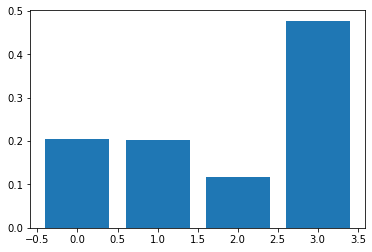

In [23]:
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()


/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender'>

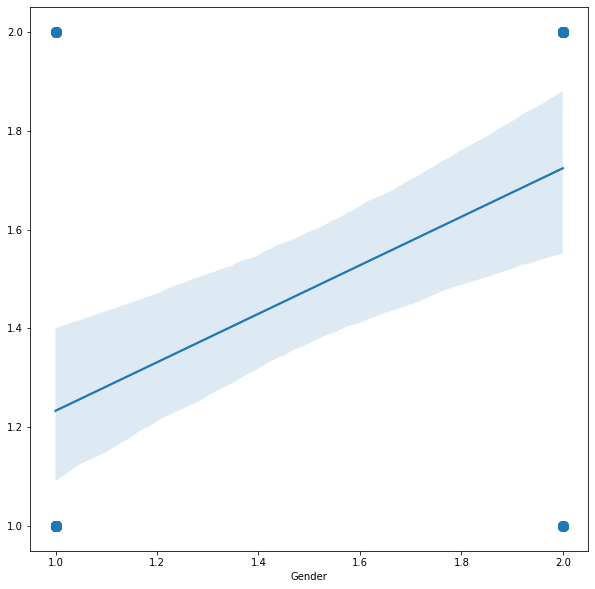

In [24]:
import seaborn as sns
pyplot.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})